<a href="https://colab.research.google.com/github/DevindiSiwurathna/CNN-Image-Classifier---CIFAR-DataSet/blob/main/CNN_Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane" , "automobile" ,"bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
classes[9]

'truck'

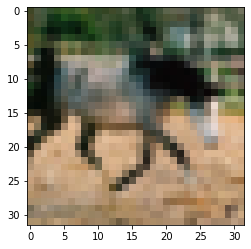

In [10]:
plt.imshow(X_train[52])

In [11]:
X_train = X_train/255
X_test = X_test/255 #normlize values

#CNN

In [12]:
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32,3)),
                         layers.Dense(3000, activation='relu'), #3000 neurones
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(10, activation = 'sigmoid') #10 categories
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy', #sparce_categoricl cross entrophy as we are using not using a one hotencoded.
            metrics = ['accuracy'])

history = ann.fit(X_train, y_train, epochs = 100) 

Epoch 1/100
1563/1563 [==============================] - 109s 69ms/step - loss: 1.8136 - accuracy: 0.3552
Epoch 2/100
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6262 - accuracy: 0.4253
Epoch 3/100
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5430 - accuracy: 0.4572
Epoch 4/100
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4816 - accuracy: 0.4775
Epoch 5/100
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4344 - accuracy: 0.4963
Epoch 6/100
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3906 - accuracy: 0.5097
Epoch 7/100
1563/1563 [==============================] - 107s 69ms/step - loss: 1.3511 - accuracy: 0.5264
Epoch 8/100
1563/1563 [==============================] - 107s 69ms/step - loss: 1.3162 - accuracy: 0.5376
Epoch 9/100
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2848 - accuracy: 0.5507
Epoch 10/100
1563/1563 [======================

In [13]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


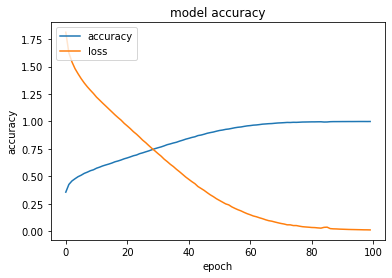

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      1000
           1       0.67      0.69      0.68      1000
           2       0.49      0.46      0.47      1000
           3       0.41      0.41      0.41      1000
           4       0.52      0.52      0.52      1000
           5       0.46      0.52      0.49      1000
           6       0.69      0.62      0.65      1000
           7       0.62      0.66      0.64      1000
           8       0.69      0.68      0.68      1000
           9       0.63      0.58      0.61      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



In [16]:
cnn = models.Sequential([
                         layers.Conv2D(filters = 32, kernel_size = (3,3),  activation = 'relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters = 64, kernel_size = (3,3),  activation = 'relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'), #3000 neurones
                         layers.Dense(10, activation = 'softmax') #10 categories
])

In [17]:
cnn.compile(optimizer = 'adam', 
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4533 - accuracy: 0.4783
Epoch 2/50
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0947 - accuracy: 0.6177
Epoch 3/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9623 - accuracy: 0.6649
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8750 - accuracy: 0.6958
Epoch 5/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8017 - accuracy: 0.7217
Epoch 6/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7434 - accuracy: 0.7420
Epoch 7/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6911 - accuracy: 0.7584
Epoch 8/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6541 - accuracy: 0.7715
Epoch 9/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6115 - accuracy: 0.7864
Epoch 10/50
1563/1563 [==============================] - 64s 41m

In [19]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 3.1019 - accuracy: 0.6664


[3.1019234657287598, 0.6664000153541565]

In [20]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

In [22]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

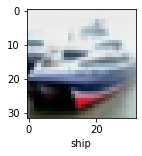

In [23]:
plot_sample(X_test, y_test, 1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.72778222e-11, 2.81168674e-14, 1.17173156e-04, 6.82454228e-01,
        6.13978650e-15, 4.95327002e-10, 4.53273188e-08, 5.00690749e-22,
        3.17428499e-01, 1.76136944e-21],
       [2.46553884e-12, 4.72719257e-04, 2.90291012e-12, 2.71531425e-18,
        3.86821667e-25, 7.89354548e-20, 7.99079306e-36, 5.38846170e-33,
        9.99527335e-01, 9.87281220e-13],
       [2.96916021e-03, 1.68317661e-01, 3.91045205e-08, 7.82142919e-08,
        1.93602379e-09, 4.68110439e-10, 6.92646740e-16, 5.25043564e-09,
        6.40071055e-04, 8.28073025e-01],
       [9.99967575e-01, 1.24110444e-11, 5.27052069e-10, 2.57108811e-17,
        1.12486484e-14, 1.39070263e-15, 2.28414579e-27, 4.83142651e-19,
        3.24648427e-05, 8.38895522e-13],
       [2.46864590e-20, 1.17256535e-19, 1.77005077e-05, 9.86575112e-02,
        8.98219645e-01, 2.67876999e-07, 3.10486555e-03, 1.17351974e-32,
        1.29053802e-23, 1.99615545e-25]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

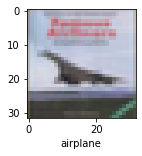

In [27]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

In [29]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1000
           1       0.77      0.81      0.79      1000
           2       0.59      0.49      0.54      1000
           3       0.47      0.45      0.46      1000
           4       0.61      0.62      0.61      1000
           5       0.52      0.58      0.55      1000
           6       0.77      0.72      0.75      1000
           7       0.71      0.73      0.72      1000
           8       0.77      0.78      0.77      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

